# Predicting Who Earns over 50k!

In this Jupyter notebook, I have used census data from over 200,000 Americans to predict which individuals earn over 50,000 USD per year. The dataframe contains 22 features, some numerical and some categorical.

In [39]:
import numpy as np
import pandas as pd
import sklearn
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in the Dataset

In [2]:
zip_file = ZipFile('census_data.zip')
df = pd.read_csv(zip_file.open('census_data.csv'))

Inspecting a small sample of the data frame

In [3]:
df.head(n = 5)

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,sex,full_or_part_time_employment_stat,...,live_in_this_house_1_year_ago,family_members_under,total_person_earnings,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,weeks_worked,earn_over_50k
0,73,Not in universe,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,Female,Not in labor force,...,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,Male,Children or Armed Forces,...,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,52,-50000
2,18,Not in universe,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,Not in labor force,...,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,0,-50000
3,9,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,...,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
4,10,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,...,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000


### Exploring and Cleaning the Data

In [4]:
df.describe()

,age,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,family_members_under,weeks_worked
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,52.000000


In [5]:
df.dtypes

age                                   int64
class_of_worker                      object
education                            object
wage_per_hour                         int64
marital_status                       object
major_industry_code                  object
major_occupation_code                object
race                                 object
sex                                  object
full_or_part_time_employment_stat    object
capital_gains                         int64
capital_losses                        int64
divdends_from_stocks                  int64
live_in_this_house_1_year_ago        object
family_members_under                  int64
total_person_earnings                object
country_of_birth_father              object
country_of_birth_mother              object
country_of_birth_self                object
citizenship                          object
own_business_or_self_employed        object
weeks_worked                          int64
earn_over_50k                   

Writing a function which finds columns by type

In [6]:
def get_cols_by_type(dataframe, dtype):
    '''
    Takes a dataframe and dtype, and returns a list of columns names of that dtype.
    '''
    index = np.where(df.dtypes == dtype)[0]
    print(str(dtype) + ":")
    print(list(dataframe.columns[index]))
    return list(dataframe.columns[index])
    

In [7]:
obj_cols = get_cols_by_type(df,'object')
int_cols = get_cols_by_type(df, 'int64')

object:
['class_of_worker', 'education', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'sex', 'full_or_part_time_employment_stat', 'live_in_this_house_1_year_ago', 'total_person_earnings', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'earn_over_50k']
int64:
['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'divdends_from_stocks', 'family_members_under', 'weeks_worked']


Now we go through each feature (column) and decide which category of data it belongs to. These categories are nominal, ordinal, interval, ratio, target

In [8]:
nominal_cols = [ 'sex', 'race', 'marital_status', 'major_industry_code', 'major_occupation_code', 'full_or_part_time_employment_stat',  \
               'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'live_in_this_house_1_year_ago', 'own_business_or_self_employed',\
                'total_person_earnings', 'citizenship', 'class_of_worker']

ordinal_cols = [ 'education']

interval_cols = [] 

ratio_cols = ['age', 'family_members_under', 'weeks_worked', 'wage_per_hour', 'capital_gains', 'capital_losses', 'divdends_from_stocks' ]

target_col = ["earn_over_50k"]

Lets look at the possible values that the nominal columns can take. This will allow us to remove some unwanted data.

In [9]:
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

sex:
['Female', 'Male']

race:
['Amer Indian Aleut or Eskimo', 'Asian or Pacific Islander', 'Black', 'Other', 'White']

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Not in universe or children', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade']

major_occupation_code:
['Adm support including clerical', 'Armed Forces', 'Executive admin and managerial', 'Farming for

We can see that there are some '?' data points which are undesirable. It makes sense to use the modal data point for that column to replace these '?' values.

In [10]:
for feature in ["country_of_birth_father", "country_of_birth_mother", "country_of_birth_self"]:
    df[feature] = df[feature].replace(['?'], df[feature].mode()[0])

Re-affirming that these are in fact removed from the data sets

In [11]:
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

sex:
['Female', 'Male']

race:
['Amer Indian Aleut or Eskimo', 'Asian or Pacific Islander', 'Black', 'Other', 'White']

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Not in universe or children', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade']

major_occupation_code:
['Adm support including clerical', 'Armed Forces', 'Executive admin and managerial', 'Farming for

We also notice that there are lots of 'Not in universe' values. We shall change this (and variations of this value) to 'null'.

In [12]:
df = df.replace("Not in universe","null").replace("Not in universe or children", "null")\
                                            .replace("Not in universe under 1 year old", "null")

Checking to see that the null values have been implemented

In [13]:
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

sex:
['Female', 'Male']

race:
['Amer Indian Aleut or Eskimo', 'Asian or Pacific Islander', 'Black', 'Other', 'White']

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade', 'null']

major_occupation_code:
['Adm support including clerical', 'Armed Forces', 'Executive admin and managerial', 'Farming forestry and fishing', 'Ha

### Generating our Features

#### Nominal Columns

I am going to binarise the following columns such that its easier to build the model. We have previously seen that the 'United States' is the most common country - therefore for country features, we will set 'United States' to be 1, and the other countries to be 0. For sex, male = 1 and female = 0 so on and so forth.

We will create new columns im the same dataframe to house this data.

In [14]:
features = [ 'sex', 'live_in_this_house_1_year_ago', 'country_of_birth_father', 'country_of_birth_mother',\
            'country_of_birth_self', 'own_business_or_self_employed' ]
df['binary_sex'] = np.where(df['sex'] == 'Male',1,0)
df['binary_LITH1YA'] = np.where(df['live_in_this_house_1_year_ago'] == 'Yes',1,0)
df['binary_father_birth'] = np.where(df['country_of_birth_father'] == 'United-States',1,0)
df['binary_mother_birth'] = np.where(df['country_of_birth_mother'] == 'United-States',1,0)
df['binary_self_birth'] = np.where(df['country_of_birth_self'] == 'United-States',1,0)
df['binary_OB_SE'] = np.where(df['own_business_or_self_employed'] == 'Yes',1,0)

In [15]:
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,sex,full_or_part_time_employment_stat,...,citizenship,own_business_or_self_employed,weeks_worked,earn_over_50k,binary_sex,binary_LITH1YA,binary_father_birth,binary_mother_birth,binary_self_birth,binary_OB_SE
0,73,null,High school graduate,0,Widowed,null,null,White,Female,Not in labor force,...,Native- Born in the United States,null,0,-50000,0,0,1,1,1,0
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,Male,Children or Armed Forces,...,Native- Born in the United States,null,52,-50000,1,0,1,1,1,0
2,18,null,10th grade,0,Never married,null,null,Asian or Pacific Islander,Female,Not in labor force,...,Foreign born- Not a citizen of U S,null,0,-50000,0,0,0,0,0,0
3,9,null,Children,0,Never married,null,null,White,Female,Children or Armed Forces,...,Native- Born in the United States,null,0,-50000,0,1,1,1,1,0
4,10,null,Children,0,Never married,null,null,White,Female,Children or Armed Forces,...,Native- Born in the United States,null,0,-50000,0,1,1,1,1,0


Now we have created new columns, we can drop the 'parent' columns that the binary columns were derived from

In [16]:
drop_cols = ["sex", "live_in_this_house_1_year_ago", "country_of_birth_father",
            "country_of_birth_mother", "country_of_birth_self", "own_business_or_self_employed"]
df = df.drop(columns = drop_cols)

In [17]:
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,full_or_part_time_employment_stat,capital_gains,...,total_person_earnings,citizenship,weeks_worked,earn_over_50k,binary_sex,binary_LITH1YA,binary_father_birth,binary_mother_birth,binary_self_birth,binary_OB_SE
0,73,null,High school graduate,0,Widowed,null,null,White,Not in labor force,0,...,null,Native- Born in the United States,0,-50000,0,0,1,1,1,0
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,Children or Armed Forces,0,...,null,Native- Born in the United States,52,-50000,1,0,1,1,1,0
2,18,null,10th grade,0,Never married,null,null,Asian or Pacific Islander,Not in labor force,0,...,null,Foreign born- Not a citizen of U S,0,-50000,0,0,0,0,0,0
3,9,null,Children,0,Never married,null,null,White,Children or Armed Forces,0,...,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0
4,10,null,Children,0,Never married,null,null,White,Children or Armed Forces,0,...,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0


We have dealt with 6 of the nominal columns so far. The remaining columns do not have a clear way to binarize the data without oversimplifying the model. Therefore, we will use one hot vector encoding.

In [18]:
remaining_nominal_cols = list(set(nominal_cols)-set(drop_cols))

#### Ordinal Features

To deal with ordinal columns, I have created a dictionary of the column entries and ordered them based on my judgment of whether they are more or less likely to allow you to earn over 50k. 

The keys are the column entries and the values are integer numbers starting from 0, which increases depending on how likely its corresponding 'key' will earn over 50k.

My only ordinal column is education - hence we have only one dictionary.

In [19]:
education_dict = {'Children':0,
                 'Less than 1st grade':1,
                 '1st 2nd 3rd or 4th grade':2,
                 '5th or 6th grade':3,
                 '7th and 8th grade':4,
                 '9th grade':5,
                 '10th grade':6,
                 '11th grade':7,
                 '12th grade no diploma':8,
                 'High school graduate':9,
                  'Some college but no degree':9,
                  'Associates degree-academic program':10,
                  'Associates degree-occup /vocational':10,
                  'Bachelors degree(BA AB BS)':11,
                  'Masters degree(MA MS MEng MEd MSW MBA)':12,
                  'Prof school degree (MD DDS DVM LLB JD)':12,
                  'Doctorate degree(PhD EdD)':13
                  }

I will now use a mapping function to change these categorical values to numerically ordered ones within the dataframe.

In [20]:
df["education"] = df["education"].map(education_dict)

In [21]:
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,full_or_part_time_employment_stat,capital_gains,...,total_person_earnings,citizenship,weeks_worked,earn_over_50k,binary_sex,binary_LITH1YA,binary_father_birth,binary_mother_birth,binary_self_birth,binary_OB_SE
0,73,null,9,0,Widowed,null,null,White,Not in labor force,0,...,null,Native- Born in the United States,0,-50000,0,0,1,1,1,0
1,58,Self-employed-not incorporated,9,0,Divorced,Construction,Precision production craft & repair,White,Children or Armed Forces,0,...,null,Native- Born in the United States,52,-50000,1,0,1,1,1,0
2,18,null,6,0,Never married,null,null,Asian or Pacific Islander,Not in labor force,0,...,null,Foreign born- Not a citizen of U S,0,-50000,0,0,0,0,0,0
3,9,null,0,0,Never married,null,null,White,Children or Armed Forces,0,...,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0
4,10,null,0,0,Never married,null,null,White,Children or Armed Forces,0,...,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0


### Ratio Features

The ratio features have a very different scaling system. This could lead to a large skewing in the model in favour of this feature. This effect will be mitigated by using the min-max scaler feature in SK-learn to restrict the values i=to an interval [0,1]

### Target Features

Here, we will make note of the target feature which is the "earn_over_50k" column. We will binarise this column where the number 1 will represent those earning over 50k.

In [22]:
labels = np.where(df["earn_over_50k"]=="-50000", 0, 1)

In [23]:
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,full_or_part_time_employment_stat,capital_gains,...,total_person_earnings,citizenship,weeks_worked,earn_over_50k,binary_sex,binary_LITH1YA,binary_father_birth,binary_mother_birth,binary_self_birth,binary_OB_SE
0,73,null,9,0,Widowed,null,null,White,Not in labor force,0,...,null,Native- Born in the United States,0,-50000,0,0,1,1,1,0
1,58,Self-employed-not incorporated,9,0,Divorced,Construction,Precision production craft & repair,White,Children or Armed Forces,0,...,null,Native- Born in the United States,52,-50000,1,0,1,1,1,0
2,18,null,6,0,Never married,null,null,Asian or Pacific Islander,Not in labor force,0,...,null,Foreign born- Not a citizen of U S,0,-50000,0,0,0,0,0,0
3,9,null,0,0,Never married,null,null,White,Children or Armed Forces,0,...,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0
4,10,null,0,0,Never married,null,null,White,Children or Armed Forces,0,...,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0


### Further SK Learn Processing

The following code, will prepare the data to be trained on using a SK-Learn classifier 

But first, we create a new dataframe out of the old data. The new dataframe will consist of the binary columns, the ratio columms and the remaining_nominal_cols. They have been arranged such that the numerical columns are on the left and the nominal features are on the right hand side. 

In [24]:
bin_cols = ['education',
            'binary_LITH1YA',
             'binary_OB_SE',
             'binary_father_birth',
             'binary_mother_birth',
             'binary_self_birth',
             'binary_sex']
cols = ratio_cols+bin_cols+remaining_nominal_cols

data = df[cols]

data.head()

,age,family_members_under,weeks_worked,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,education,binary_LITH1YA,binary_OB_SE,...,binary_self_birth,binary_sex,total_person_earnings,citizenship,race,major_industry_code,full_or_part_time_employment_stat,marital_status,class_of_worker,major_occupation_code
0,73,0,0,0,0,0,0,9,0,0,...,1,0,null,Native- Born in the United States,White,null,Not in labor force,Widowed,null,null
1,58,1,52,0,0,0,0,9,0,0,...,1,1,null,Native- Born in the United States,White,Construction,Children or Armed Forces,Divorced,Self-employed-not incorporated,Precision production craft & repair
2,18,0,0,0,0,0,0,6,0,0,...,0,0,null,Foreign born- Not a citizen of U S,Asian or Pacific Islander,null,Not in labor force,Never married,null,null
3,9,0,0,0,0,0,0,0,1,0,...,1,0,Both parents present,Native- Born in the United States,White,null,Children or Armed Forces,Never married,null,null
4,10,0,0,0,0,0,0,0,1,0,...,1,0,Both parents present,Native- Born in the United States,White,null,Children or Armed Forces,Never married,null,null


Now we will make use of SK-Learns transformer and pipeline modules to finish the preprocessing of the dataframe. 

For the numeric values, I have chosen to deal with the missing values by using the 'median' value, and I have used the MinMaxScaler to constrict the values to the interval [0,1]. 

For the categorical features (the remaining nominal columns), I have filled the missing values in using the word 'null'. I have also one hot vector encoded the columns as they did not make much sense to binarise them.

Finally, I combined both pipelines to create my column transformer which is now ready to transform my pandas data frame 'data' into a more usable format. 



In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ratio_cols+bin_cols

numeric_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

categorical_features = remaining_nominal_cols

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='null')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [26]:
processed_data = preprocessor.fit_transform(data)

In [27]:
processed_data

<199523x92 sparse matrix of type '<class 'numpy.float64'>'
	with 4389506 stored elements in Compressed Sparse Row format>

## Model Training 

Lets train a Logistic Regression Classifier first ...

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

Creating my training testing splits ...

In [29]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, labels, test_size = 0.25, train_size = 0.75,\
                                                   random_state = 20, shuffle = True)

Performing grid search to fine the optimum regularisation parameter.

In [30]:
parameters = {'C': [0.1,1,10,100]}
logr =LogisticRegression(tol = 1e-2,max_iter = 10000)
clf = GridSearchCV(logr, parameters)
clf.fit(X_train,y_train)
print("The prediction accuracy of the Logistic Regression model is {a}%".format(a=100*clf.score(X_test,y_test)))


The prediction accuracy of the Logistic Regression model is 95.12840560534072%


In [36]:
logr_ypred = clf.predict(X_test)

Let's train a Random Forest Classifier ...

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RFC = Pipeline(steps=[('RFC', RandomForestClassifier())])
#Parameters currently in use by the Random Forest Classifier
from pprint import pprint
pprint(RFC.get_params())

{'RFC': RandomForestClassifier(),
 'RFC__bootstrap': True,
 'RFC__ccp_alpha': 0.0,
 'RFC__class_weight': None,
 'RFC__criterion': 'gini',
 'RFC__max_depth': None,
 'RFC__max_features': 'auto',
 'RFC__max_leaf_nodes': None,
 'RFC__max_samples': None,
 'RFC__min_impurity_decrease': 0.0,
 'RFC__min_impurity_split': None,
 'RFC__min_samples_leaf': 1,
 'RFC__min_samples_split': 2,
 'RFC__min_weight_fraction_leaf': 0.0,
 'RFC__n_estimators': 100,
 'RFC__n_jobs': None,
 'RFC__oob_score': False,
 'RFC__random_state': None,
 'RFC__verbose': 0,
 'RFC__warm_start': False,
 'memory': None,
 'steps': [('RFC', RandomForestClassifier())],
 'verbose': False}


In [33]:
RFC.fit(X_train, y_train)

print("The prediction accuracy of the Random Forest Classifier model is {a}%".format(a=100*RFC.score(X_test,y_test)))


The prediction accuracy of the Random Forest Classifier model is 95.39504019566569%


In [34]:
rfc_ypred = RFC.predict(X_test)

Evaluating the Random Forest Classifier and the Logistic Regression Classifier. We can see that the random forest classifier is more accurate by ~ 0.27% but we can have a look at the ROC curve to further assess.

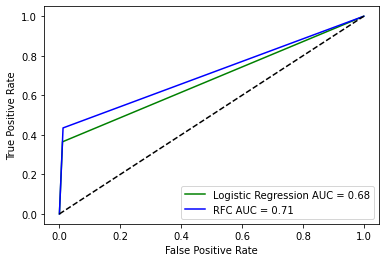

In [41]:
from sklearn.metrics import roc_curve, auc
#ROC Curve for train data over different thresholds
fpr, tpr, thresholds = roc_curve(y_test, logr_ypred) #log regression
fpr1, tpr1, thresholds1 = roc_curve(y_test, rfc_ypred) #RFC 
roc_auc = auc(fpr,tpr)
roc_auc_1 = auc(fpr1,tpr1)
plt.plot(fpr,tpr,'g',label='Logistic Regression AUC = %0.2f'% roc_auc) #logr
plt.plot(fpr1,tpr1,'b',label='RFC AUC = %0.2f'% roc_auc_1) #RFC
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.savefig('ROC validation data.png', dpi=300, bbox_inches='tight')
plt.show()

This plot reaffirms that the random forest classifier is a more accurate model when considering this dataset.